In [1]:
import pandas as pd
import string
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import GetOldTweets3 as twt
import seaborn as sns

In [2]:
#stop words
p=string.punctuation
stop_words = stopwords.words('english')
print("Stop_words:---\n",stop_words)
print('\nPUNCTUATIONS:\n',p)

Stop_words:---
 ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same',

**BEFORE OUTBREAK**

In [3]:
before_outbreak = twt.manager.TweetCriteria().setQuerySearch('wuhan Pneumonia ').setSince("2019-12-07").setUntil("2020-01-06") \
        .setMaxTweets(600)
    
before= twt.manager.TweetManager.getTweets(before_outbreak)
    
text_before = [[i.text.lower()] for i in before]

In [4]:
print("Tweets Found:",len(text_before))

Tweets Found: 392


In [5]:
print("Tweets_Found\n\n",text_before)

Tweets_Found

 [['wuhan pneumonia: first suspected case identified in singapore '], ['#china #pneumonia #outbreak: #singapore reports #first #suspected case linked to #wuhan, reminiscent of #sars #wuhanpneumonia #globalhealth #international #publichealth #phcm9605 #contagion #epidemic #respiratory #infection https://www.scmp.com/news/asia/east-asia/article/3044730/china-pneumonia-singapore-reports-first-suspected-case-linked via @scmpnews'], ['first they are using the police force as a way to curb the protest now they are using #wuhanpneumonia to curb it what a shameless gov '], ['i have family who travel to china every lunar new year, and the #wuhanpneumonia #wuhansars outbreak or whatever frightens me, because #chinalies. who sat on the plane seat before them? who coughed next to them on the train? it’s not about wuhan, once it spreads.'], ['"no clear evidence of person-to-person spread of the infection, and no cases among health workers" "would suggest it’s not transmitting efficien

In [6]:
#cleaning  "text_before"
extracted1= ""
for i in range(0, len(text_before)):
    extracted1 = text_before[i][0] + " " + extracted1

lower = extracted1.lower()

# Removing punctuation marks
cleaned_before= lower.translate(str.maketrans('', '', string.punctuation))

# word tokenizarion using NLTK
tokenized_before = word_tokenize(cleaned_before)

In [7]:
print("No of words extracted:",len(tokenized_before),"\n Words: \n",tokenized_before)

No of words extracted: 7466 
 Words: 
 ['chinese', 'health', 'officials', 'investigating', 'wuhan', 'pneumonia', 'cases', 'amid', 'sars', 'rumours', 'httpdlvritrmclzd', 'latest', 'news', 'chinese', 'health', 'officials', 'investigating', 'wuhan', 'pneumonia', 'cases', 'amid', 'sars', 'rumours', 'the', 'globe', 'and', 'mail', 'has', 'been', 'published', 'on', 'canada', 'news', 'media', 'httpscanadanewsmediacachinesehealthofficialsinvestigatingwuhanpneumoniacasesamidsarsrumourstheglobeandmail', 'news', 'chinese', 'health', 'officials', 'investigating', 'wuhan', 'pneumonia', 'cases', 'amid', 'sars', 'rumours', 'via', 'globeandmail', 'httpswwwtheglobeandmailcomworldarticlechinesehealthofficialsinvestigatingwuhanpneumoniacasesamidsarsutmmediumreferrersocialnetworkmediaamputmcampaignsharedwebarticlelinks', 'follow', 'flutrackers', 'for', 'rapid', 'coverage', 'of', 'wuhan', 'pneumonia', 'cluster', 'many', 'other', 'outbreaks', 'chinese', 'health', 'officials', 'investigating', 'wuhan', 'pneum

In [8]:
#removing stop words and punctuations from tokenized_before

finalwords_before=[]
for i in tokenized_before:
    if i not in p:
        if i not in stop_words:
            finalwords_before.append(i)
            

In [9]:
print("No of Tokenized word found:",len(tokenized_before),
     "\nNo of Final Words",len(finalwords_before),
     "\nNo of words dropped", len(tokenized_before)-len(finalwords_before))

No of Tokenized word found: 7466 
No of Final Words 5398 
No of words dropped 2068


In [10]:
print("\nfinalwords_before:\n",finalwords_before)


finalwords_before:
 ['chinese', 'health', 'officials', 'investigating', 'wuhan', 'pneumonia', 'cases', 'amid', 'sars', 'rumours', 'httpdlvritrmclzd', 'latest', 'news', 'chinese', 'health', 'officials', 'investigating', 'wuhan', 'pneumonia', 'cases', 'amid', 'sars', 'rumours', 'globe', 'mail', 'published', 'canada', 'news', 'media', 'httpscanadanewsmediacachinesehealthofficialsinvestigatingwuhanpneumoniacasesamidsarsrumourstheglobeandmail', 'news', 'chinese', 'health', 'officials', 'investigating', 'wuhan', 'pneumonia', 'cases', 'amid', 'sars', 'rumours', 'via', 'globeandmail', 'httpswwwtheglobeandmailcomworldarticlechinesehealthofficialsinvestigatingwuhanpneumoniacasesamidsarsutmmediumreferrersocialnetworkmediaamputmcampaignsharedwebarticlelinks', 'follow', 'flutrackers', 'rapid', 'coverage', 'wuhan', 'pneumonia', 'cluster', 'many', 'outbreaks', 'chinese', 'health', 'officials', 'investigating', 'wuhan', 'pneumonia', 'cases', 'amid', 'sars', 'rumours', 'globe', 'mail', 'httpswwwtheglo

**AFTER OUTBREAK**

In [11]:
after_outbreak = twt.manager.TweetCriteria().setQuerySearch('corona virus').setSince("2020-01-05").setUntil("2020-02-04") \
        .setMaxTweets(600)

after = twt.manager.TweetManager.getTweets(after_outbreak)
   
text_after = [[i.text.lower()] for i in after]

In [12]:
print("Tweets Found:",len(text_after))

Tweets Found: 600


In [13]:
print("Tweets_Found\n\n",text_after)

Tweets_Found

 [['esta semana llega equipo para diagnosticar coronavirus: ministro alvarado ofreció recomendaciones a todos los venezolanos | la iguana tv https://www.laiguana.tv/articulos/654707-equipo-coronavirus-diagnosticar-recomendaciones/'], ['me dio gripe y ya tengo miedo que sea el coronavirus jaja me estoy muriendo raza '], ['umass boston student with coronavirus visited campus health center after returning from china '], ['with corona virus doin the rounds i wouldn’t wanna play in china neither '], ['beijing sees ‘major test’ as doors to china close and coronavirus deaths surpass sars - http://www.latestcommentary.com/beijing-sees-major-test-as-doors-to-china-close-and-coronavirus-deaths-surpass-sars/ #latestcomments'], ['coronavirus be like '], ['#coronavirus #yulin dog festival #boilingdogsalive'], ['thai doctors have been using a cocktail of flu and hiv drugs to treat coronavirus cases https://www.businessinsider.com/coronavirus-treatment-cocktail-of-flu-hiv-drugs-2020-2?u

In [14]:
#cleaning the texts in "text_after"
extracted2= ""
for i in range(0, len(text_after)):
    extracted2 = text_after[i][0] + " " + extracted2

lower = extracted2.lower()

# Removing punctuation marks
cleaned_after= lower.translate(str.maketrans('', '', string.punctuation))

# word tokenizarion using NLTK
tokenized_after = word_tokenize(cleaned_after)

In [15]:
print("No of words extracted:",len(tokenized_after),"\n Words: \n",tokenized_after)

No of words extracted: 11726 
 Words: 
 ['que', 'eles', 'colocaram', 'uma', 'pessoa', 'com', 'coronavírus', 'na', 'casa', 'do', 'bbb', 'e', 'o', 'vendedor', 'será', 'o', 'último', 'que', 'sobreviver', 'vai', 'ganhar', 'o', 'antídoto', 'e', '120', 'reais', 'pra', 'curtir', 'uma', 'night', 'em', 'realengo', 'चीन', 'में', 'जानलेवा', 'कोरोनावायरस', 'के', 'चलते', 'मृतकों', 'की', 'संख्या', 'लगातार', 'बढ़ती', 'जा', 'रही', 'है।', 'coronavirusoutbreak', 'coronavirus', 'coronaviruschina', 'caso', 'coronavirus', 'mira', 'cómo', 'reacionan', 'los', 'países', 'productores', 'petróleo', 'ante', 'baja', 'de', 'precios', 'httpshaciendonoticiascomdocasocoronavirusmiracomoreacionanlospaisesproductorespetroleoantebajadeprecios', 'migues', 'news', 'los', 'chinos', 'nos', 'quieren', 'matar', 'coronavirus', 'httpsyoutube3jfikup4ma', 'vía', 'youtube', 'coronavirus', 'outbreak', 'likely', 'began', 'with', 'bats', 'an', 'omen', 'for', 'next', 'epidemic', 'bloomberg', 'as', 'of', 'right', 'now', 'the', 'overall

In [16]:
#removing stop words from tokenized_before
finalwords_after=[i for i in tokenized_after if i not in p if i not in stop_words]

In [17]:
print("No of Tokenized word found:",len(tokenized_after),
     "\nNo of Final Words",len(finalwords_after),
     "\nNo of words dropped", len(tokenized_after)-len(finalwords_after))

No of Tokenized word found: 11726 
No of Final Words 8980 
No of words dropped 2746


In [18]:
print("\nfinalwords_after:\n",finalwords_after)


finalwords_after:
 ['que', 'eles', 'colocaram', 'uma', 'pessoa', 'com', 'coronavírus', 'na', 'casa', 'bbb', 'e', 'vendedor', 'será', 'último', 'que', 'sobreviver', 'vai', 'ganhar', 'antídoto', 'e', '120', 'reais', 'pra', 'curtir', 'uma', 'night', 'em', 'realengo', 'चीन', 'में', 'जानलेवा', 'कोरोनावायरस', 'के', 'चलते', 'मृतकों', 'की', 'संख्या', 'लगातार', 'बढ़ती', 'जा', 'रही', 'है।', 'coronavirusoutbreak', 'coronavirus', 'coronaviruschina', 'caso', 'coronavirus', 'mira', 'cómo', 'reacionan', 'los', 'países', 'productores', 'petróleo', 'ante', 'baja', 'de', 'precios', 'httpshaciendonoticiascomdocasocoronavirusmiracomoreacionanlospaisesproductorespetroleoantebajadeprecios', 'migues', 'news', 'los', 'chinos', 'nos', 'quieren', 'matar', 'coronavirus', 'httpsyoutube3jfikup4ma', 'vía', 'youtube', 'coronavirus', 'outbreak', 'likely', 'began', 'bats', 'omen', 'next', 'epidemic', 'bloomberg', 'right', 'overall', 'rate', 'new', 'confirmed', 'cases', 'slowing', 'adamalethier', 'information', 'anoth

**SENTIMENT ANALYSIS BEFORE OUTBREAK**

In [19]:
# Getting emotion_document for analysis

emotion = []
with open(r"C:\Users\mishr\covid_emotion_bo.txt", 'r') as file:
    for i in file:
        x= i.replace('\n', '').replace(',', '').replace("'", '').strip()
        words, emotions = x.split(':')
        
        if words in finalwords_before:
            emotion.append(emotions)

In [20]:
wb = Counter(emotion)

In [21]:
df_b = pd.DataFrame.from_dict(wb, orient='index').reset_index().rename(columns={'index':'sentiment', 0:'count'})
df_b

,sentiment,count
0,unhealthiness,36
1,officials,7
2,province,15
3,fearful,20
4,awareness,5
5,illness,4
6,hospital,3
7,traveller,4
8,cured,2
9,food,9


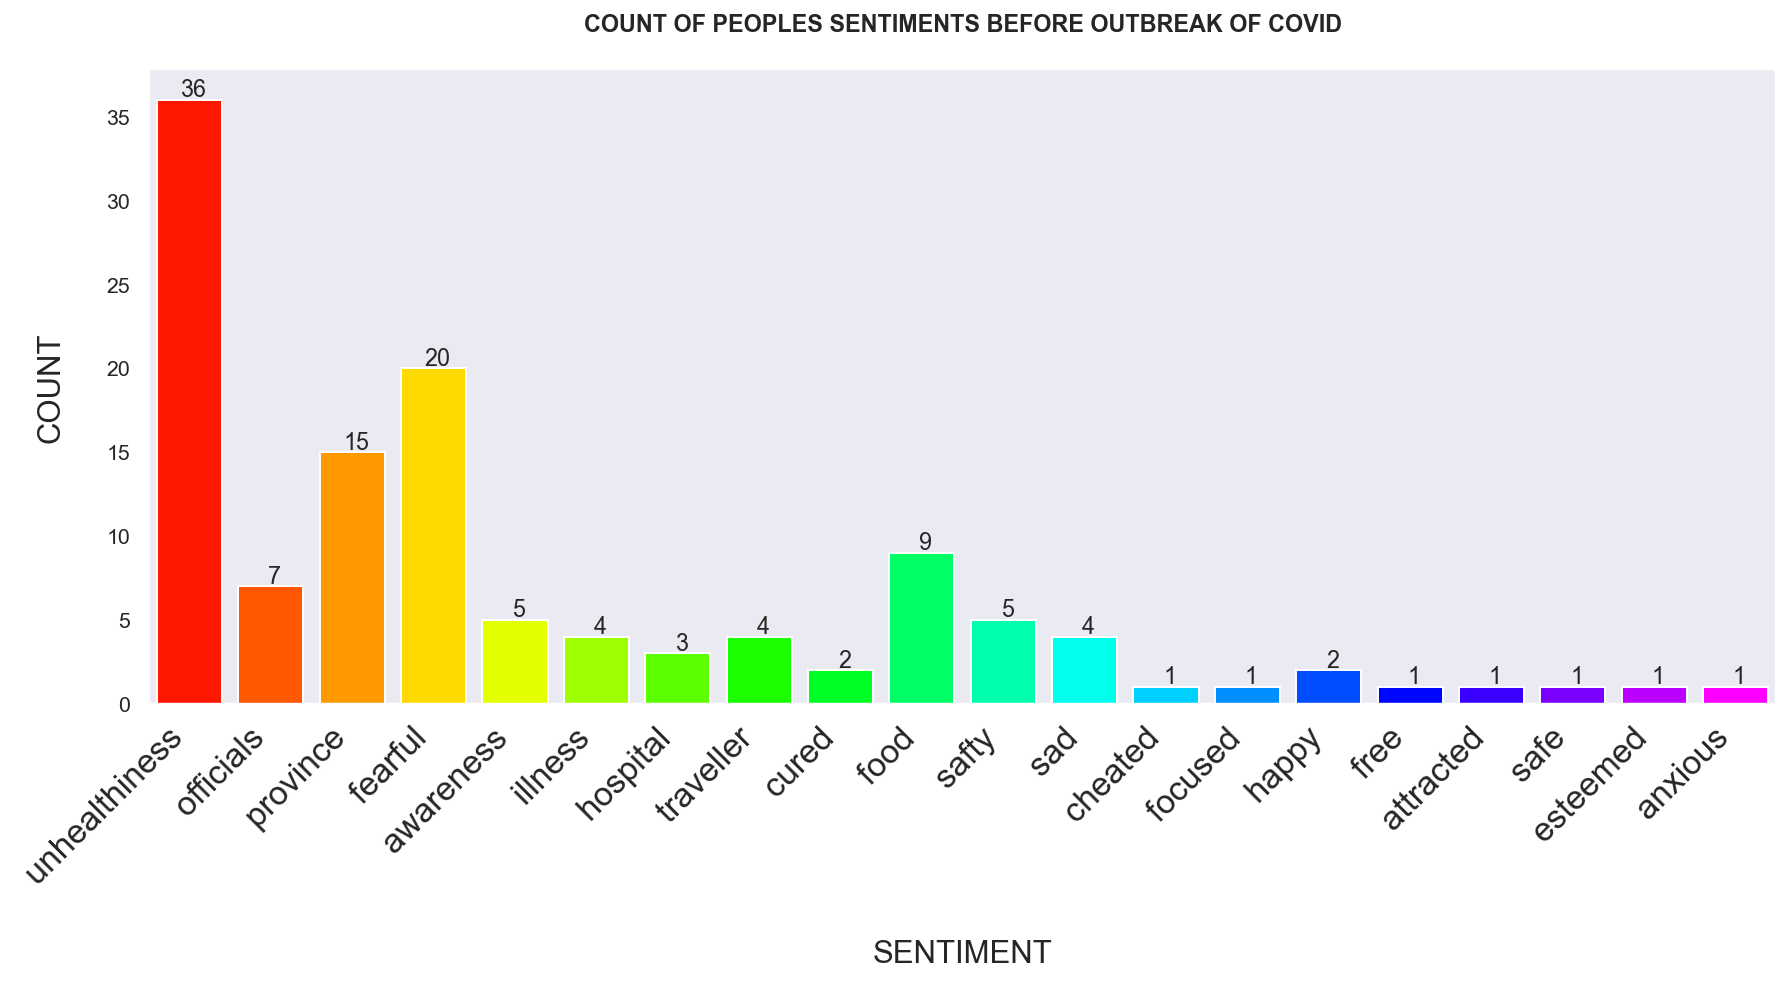

In [22]:
plt.figure(figsize=(15,6),dpi=140)
sns.set_context('talk',font_scale=2)
sns.set(style='dark')
m=sns.barplot(x='sentiment', y='count',data=df_b,palette='gist_rainbow', saturation=75)
m.set_xticklabels(m.get_xticklabels(),rotation=45,horizontalalignment='right',fontweight='light',fontsize='x-large')
for i in m.patches:
    m.annotate(format(i.get_height(),'.0f'),(i.get_x()+i.get_width()/2,i.get_height()),xytext=(2,5),ha='center',va='center',textcoords='offset points')
plt.xlabel('\nSENTIMENT',fontsize=16)
plt.ylabel('COUNT\n',fontsize=16)
plt.title('COUNT OF PEOPLES SENTIMENTS BEFORE OUTBREAK OF COVID\n',weight='bold')
plt.show()

**SENTIMENT ANALYSIS AFTER OUTBREAK**

In [23]:
# Getting emotion_document for analysis
emot = []
with open(r"C:\Users\mishr\covid_emo_ao.txt", 'r') as file:
    for i in file:
        x= i.replace('\n', '').replace(',', '').replace("'", '').strip()
        words, emotions = x.split(':')
        
        if words in finalwords_after:
            emot.append(emotions)

In [24]:
wa = Counter(emot)

In [25]:
df_a = pd.DataFrame.from_dict(wa, orient='index').reset_index().rename(columns={'index':'sentiment', 0:'count'})
df_a

,sentiment,count
0,awareness,6
1,fear,23
2,cause,17
3,sad,25
4,virus,38
5,safty,17
6,care,18
7,city,5
8,happy,3
9,violence,11


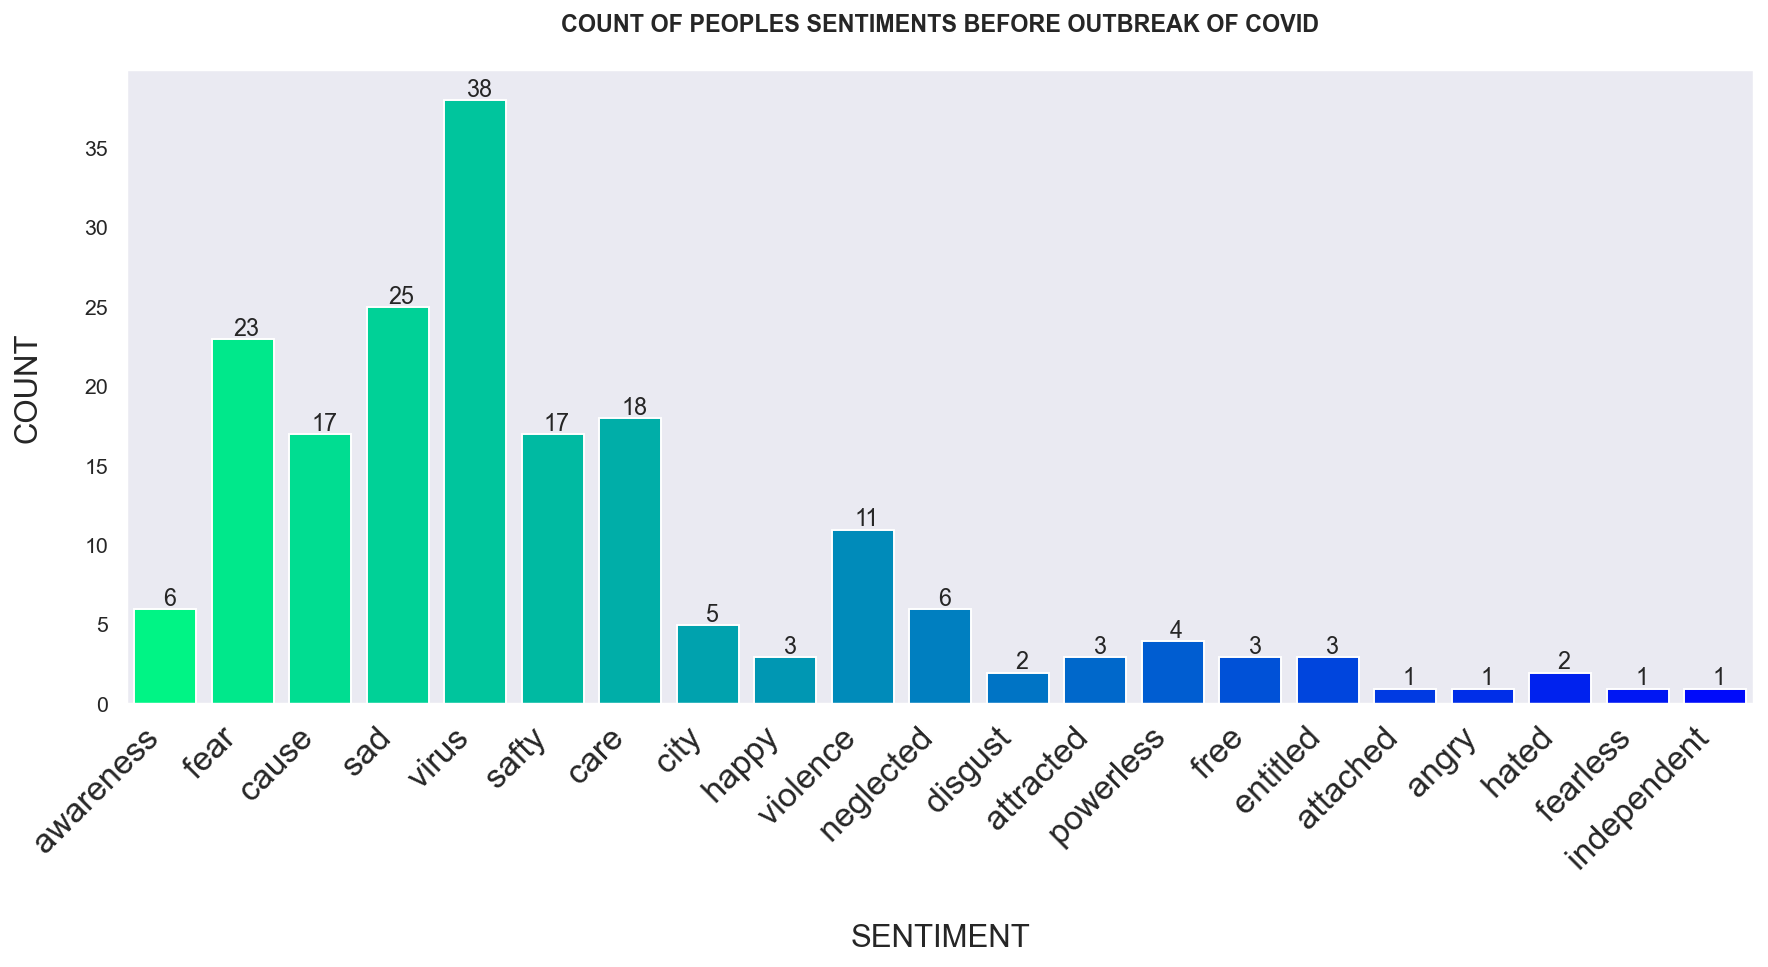

In [26]:
plt.figure(figsize=(15,6),dpi=140)
sns.set_context('talk',font_scale=2)
sns.set(style='dark')
m=sns.barplot(x='sentiment', y='count',data=df_a,palette='winter_r', saturation=75)
m.set_xticklabels(m.get_xticklabels(),rotation=45,horizontalalignment='right',fontweight='light',fontsize='x-large')
for i in m.patches:
    m.annotate(format(i.get_height(),'.0f'),(i.get_x()+i.get_width()/2,i.get_height()),xytext=(2,5),ha='center',va='center',textcoords='offset points')
plt.xlabel('\nSENTIMENT',fontsize=16)
plt.ylabel('COUNT\n',fontsize=16)
plt.title('COUNT OF PEOPLES SENTIMENTS BEFORE OUTBREAK OF COVID\n',weight='bold')
plt.show()